In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import imutils
import cv2
import random
import skimage as sk
from scipy import ndarray
from skimage import transform
from skimage import util

plt.style.use('fivethirtyeight')

Height of input image:  556
Width of input image:  989


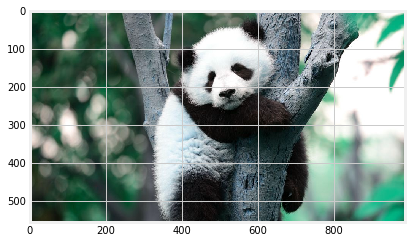

In [2]:
'''Loading image and plotting'''

imagePath = 'panda.jpg'
image = cv2.imread(imagePath)
plt.imshow(image)

print('Height of input image: ', image.shape[0])
print('Width of input image: ', image.shape[1])

In [3]:
'''Function using to random rotation, noise, and flip'''

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels
    return image_array[:,::-1]

In [4]:
'''Dictionary of the transformations functions we defined earlier '''

available_transformations = {'rotate': random_rotation,
                             'noise': random_noise,
                             'horizontal_flip': horizontal_flip}

In [5]:
'''Execute augmentation'''

transformed_image_rotate = available_transformations['rotate'](image)
transformed_image_noise = available_transformations['noise'](image)
transformed_image_horizontail_flip = available_transformations['horizontal_flip'](image)

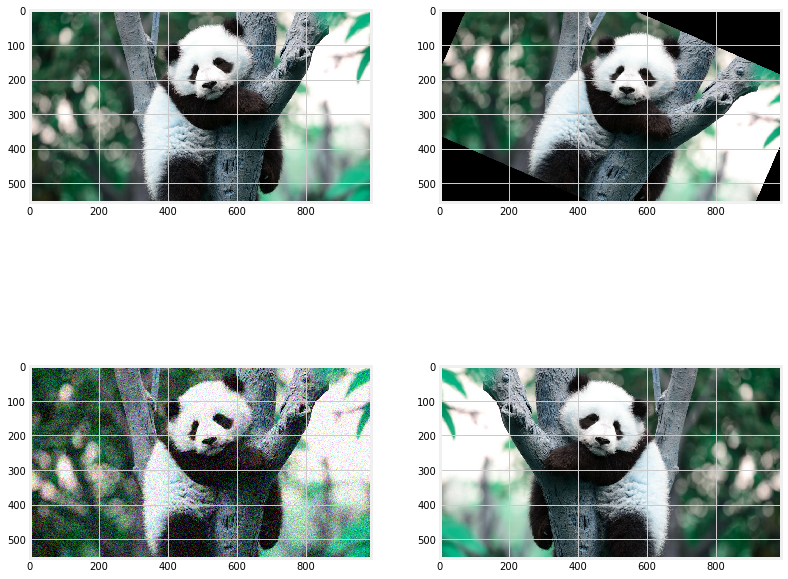

In [6]:
'''Set up matplotlib figure and size it to fit 4x4 pics'''

plt.figure(figsize = (12, 12))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(transformed_image_rotate)
plt.subplot(223)
plt.imshow(transformed_image_noise)
plt.subplot(224)
plt.imshow(transformed_image_horizontail_flip)
plt.show()

In [7]:
'''Function using to random bright and transform'''

def augment_brightness_camera_images(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random_bright = 0.25 + np.random.uniform()
    image[:,:,2] = image[:,:,2] * random_bright
    image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    return image

def transform_image(image, ang_range, shear_range, trans_range, brightness = 0):
    '''
    This function transform images to generate new images.
    The function takes in following arguments,
    1 - Image
    2 - ang_range: Range of angles for rotation
    3 - shear_range: Range of values to apply affine transform to
    4 - trans_range: Range of values to apply translations over
    
    A Random uniform distribution is used to generate different parameters for transformation
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range) - ang_range/2
    rows, cols, ch = image.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2, rows/2), ang_rot, 1)
    
    # Translation
    tr_x = trans_range * np.random.uniform() - trans_range/2
    tr_y = trans_range * np.random.uniform() - trans_range/2
    Trans_M = np.float32([[1, 0, tr_x], [0, 1, tr_y]])
    
    # Shear
    pts1 = np.float32([[5, 5], [20, 5], [5, 20]])
    pt1 = 5 + shear_range * np.random.uniform() - shear_range/2
    pt2 = 20 + shear_range * np.random.uniform() - shear_range/2
    
    # Brightness
    pts2 = np.float32([[pt1, 5], [pt2, pt1], [5,pt2]])
    shear_M = cv2.getAffineTransform(pts1, pts2)
    
    image = cv2.warpAffine(image, Rot_M, (cols, rows))
    image = cv2.warpAffine(image, Trans_M, (cols, rows))
    image = cv2.warpAffine(image, shear_M, (cols, rows))
    
    if brightness == 1:
        image = augment_brightness_camera_images(image)
        
    return image

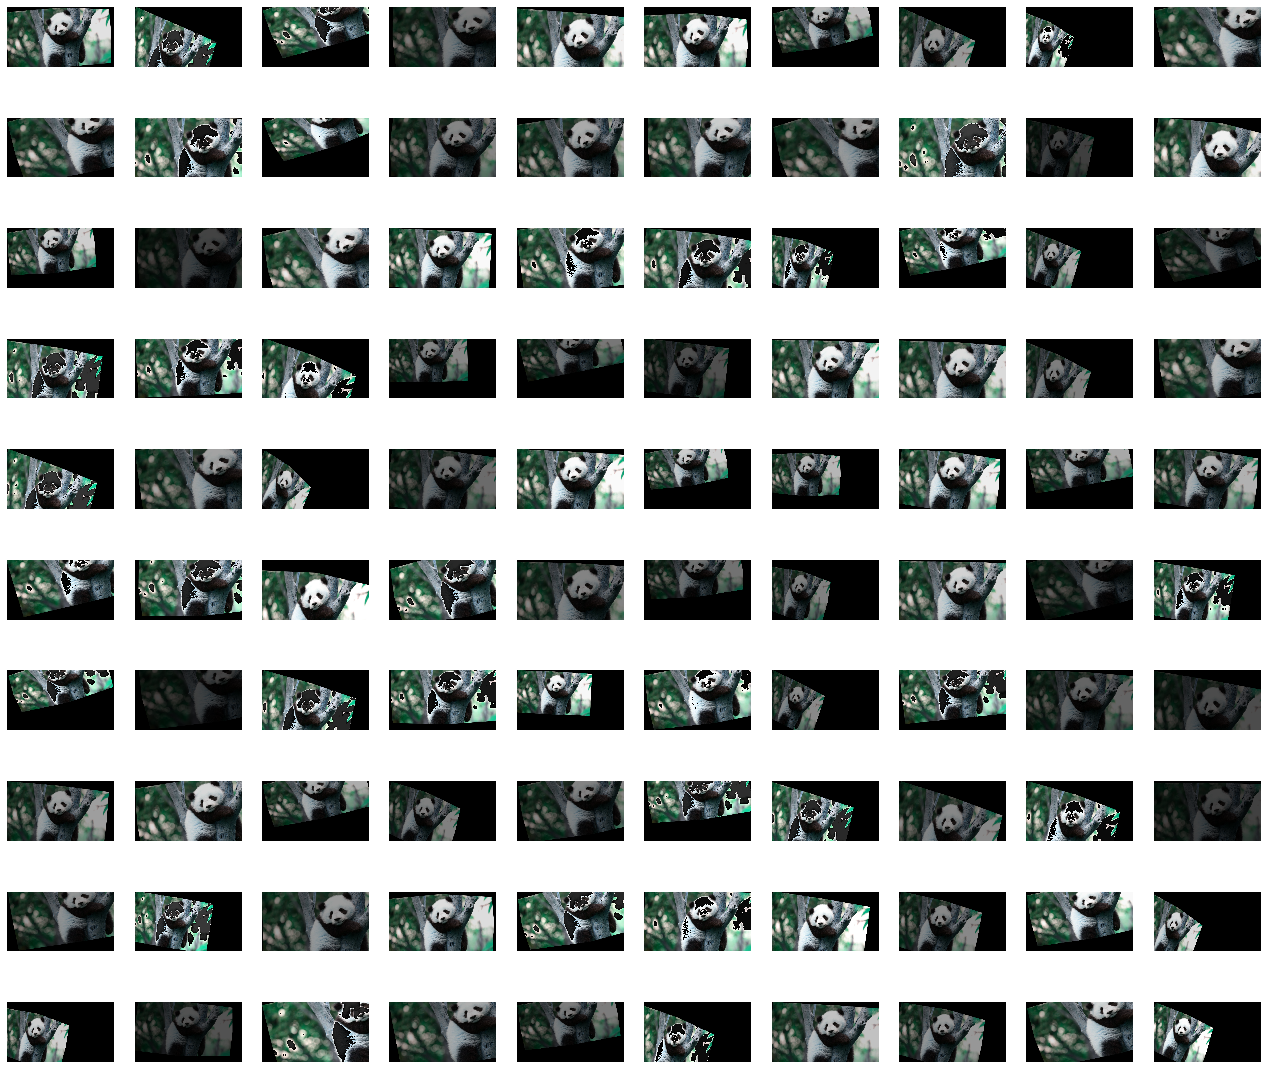

In [8]:
'''Plotting with Gridspec'''

plot = gridspec.GridSpec(10, 10)
plot.update(wspace = 0.01, hspace = 0.02)
plt.figure(figsize = (20, 20))

for i in range(100):
    ax = plt.subplot(plot[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    augmented_image = transform_image(image, 20, 10, 5, brightness = 1)
    
    plt.subplot(10, 10, i+1)
    plt.imshow(augmented_image)
    plt.axis('off')
    
plt.show()